In [261]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In a new cell type: %matplotlib inline. This will make your plots show in the notebook without having to call plt.show() every time. Helpful down the road!

In [262]:
%matplotlib inline

Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [263]:
gdp_df = pd.read_csv("..\data\gdp_percapita.csv",nrows=6729)
gdp_df.iloc[:6]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


Read in internet_use required clean up to exclude the bad lines with 'error_bad_lines=False' and then remove footnotes using iloc to identify where they started (row 4495 is the last row of data so nrows=4495 reduced to that ending row)

In [264]:
#internet_df = pd.read_csv("..\data\internet_use.csv",error_bad_lines=False)
internet_df = pd.read_csv("..\data\internet_use.csv",nrows=4495)
#internet_df.iloc[4494]
internet_df.iloc[:6]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


Look at the shape of each dataframe - how many rows, how many columns.

In [265]:
gdp_df.shape

(6729, 4)

In [266]:
internet_df.shape

(4495, 4)

Take a look at the data types for the columns in each table.

In [267]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [268]:
print(internet_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


Take a look at the last 10 rows of each dataset in turn.

In [269]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [270]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


Drop the 'value footnotes' data from both datasets. Check that this worked as expected.
COMMENT: df = df[df.columns.drop(col_to_drop)] didn't work but dropna(axis=1) did work and adding axis=1 fixes the other

In [271]:
# column_to_drop = ['Value Footnotes']
# gdp_df = gdp_df[gdp_df.drop(column_to_drop)]
gdp_df = gdp_df.dropna(axis = 1)
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [272]:
internet_df = internet_df.drop(columns=["Value Footnotes"],axis=1)

In [273]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [274]:
gdp_df = gdp_df.rename(columns={"Country or Area":"Country", "Value": "GDP_Per_Capita"})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [275]:
internet_df = internet_df.rename(columns={"Country or Area":"Country", "Value": "Internet_Users_Pct"})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. 
Call the new DataFrame gdp_and_internet_use.
Look at the first five rows of your new data frame to confirm the columns are how you expect.

In [276]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country','Year'],how='outer')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


Look at the last five rows to make sure the data is clean and as expected.

In [277]:
gdp_and_internet_use.tail(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7695,Virgin Islands (U.S.),2002,NaN,27.494432
7696,Virgin Islands (U.S.),2001,NaN,18.375766
7697,Virgin Islands (U.S.),2000,NaN,13.815081
7698,Virgin Islands (U.S.),1999,NaN,11.074606
7699,Virgin Islands (U.S.),1998,NaN,9.245220
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


Look at the shape of the new dataset. Were any rows dropped?

In [278]:
gdp_and_internet_use.shape

(7705, 4)

Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [279]:
subset = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
subset.shape

(835, 4)

Create three new data frames, one for 2004, one for 2009, and one for 2014. 
Give them meaningful names that aren't too long.

In [280]:
gdp_internet_2004 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004])]
gdp_internet_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2004,1025.208245,0.105809
31,Albania,2004,7001.054082,2.420388
60,Algeria,2004,11845.170512,4.634475
89,Angola,2004,4604.657044,0.464815
118,Antigua and Barbuda,2004,21161.123532,24.266544


In [281]:
gdp_internet_2009 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2009])]
gdp_internet_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2009,1502.354073,3.55
26,Albania,2009,9525.377979,41.20
55,Algeria,2009,12697.690780,11.23
84,Angola,2009,6292.534856,6.00
113,Antigua and Barbuda,2009,22568.626530,42.00


In [282]:
gdp_internet_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2014])]
gdp_internet_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.39
21,Albania,2014,10700.993216,60.10
50,Algeria,2014,13557.769757,18.09
79,Angola,2014,6813.052106,21.26
108,Antigua and Barbuda,2014,20440.540555,64.00


Which country had the highest percentage of internet users in 2014? What was the percentage? Repeat for 2004 and 2009. 
(Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).

In [283]:
print(gdp_internet_2004.loc[gdp_internet_2004['Internet_Users_Pct'].idxmax()])

Country                Sweden
Year                     2004
GDP_Per_Capita        40177.9
Internet_Users_Pct      83.89
Name: 5852, dtype: object


In [284]:
print(gdp_internet_2009.loc[gdp_internet_2009['Internet_Users_Pct'].idxmax()])

Country               Iceland
Year                     2009
GDP_Per_Capita        41505.1
Internet_Users_Pct         93
Name: 2586, dtype: object


In [285]:
print(gdp_internet_2014.loc[gdp_internet_2014['Internet_Users_Pct'].idxmax()])

Country               Iceland
Year                     2014
GDP_Per_Capita        42774.9
Internet_Users_Pct      98.16
Name: 2581, dtype: object


Which country had the lowest percentage of internet users in 2014? What was the percentage? Repeat for 2004 and 2009.

In [286]:
#gdp_internet_2014.dropna(axis=1)
#gdp_internet_2014.loc[gdp_internet_2014['Internet_Users_Pct'] >-1].min()
# unable to exclude as above yet so using inner join for merge
gdp_internet_2014.loc[gdp_internet_2014['Internet_Users_Pct'].idxmin()]


Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6940, dtype: object

Lowest Internet Usage using INNER join on merge above
in 2014 was Timor-Leste at 1.14%
2009 was Timor-Leste at 0.18%
2004 was Myanmar at 0.02%

Lowest Internet Usage using OUTER join on merge above
in 2014, 2009 and 2004 was Dem. People's Rep. of Korea 0%


In [287]:
#gdp_internet_2009.dropna()
gdp_internet_2009.loc[gdp_internet_2009['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6944, dtype: object

In [288]:
#gdp_internet_2004.dropna()
gdp_internet_2004.loc[gdp_internet_2004['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6949, dtype: object

Which country had the highest gdp per capita in 2014? What was the gdp per capita?
Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [289]:
print(gdp_internet_2014.loc[gdp_internet_2014['GDP_Per_Capita'].idxmax()])

print(gdp_internet_2014.loc[gdp_internet_2014['GDP_Per_Capita'].idxmin()])

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita                  130439
Internet_Users_Pct                 NaN
Name: 3639, dtype: object
Country               Central African Republic
Year                                      2014
GDP_Per_Capita                         672.682
Internet_Users_Pct                         NaN
Name: 1014, dtype: object


Country with highest GDP_per_Capita was Qatar at 116,694
Country with lowest GDP_Per_Capita was Burundi at 768.47

Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

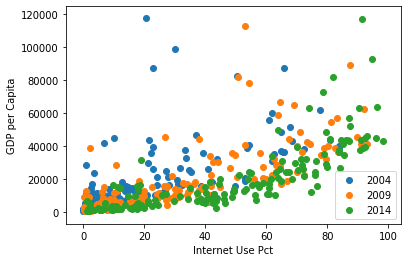

In [290]:
plt.scatter(gdp_internet_2004.Internet_Users_Pct, gdp_internet_2004.GDP_Per_Capita, label="2004") 
plt.scatter(gdp_internet_2009.Internet_Users_Pct, gdp_internet_2009.GDP_Per_Capita, label="2009")
plt.scatter(gdp_internet_2014.Internet_Users_Pct, gdp_internet_2014.GDP_Per_Capita, label="2014")
plt.legend(loc="lower right")
plt.xlabel("Internet Use Pct")
plt.ylabel("GDP per Capita")
plt.show()

Are there differences across years? What do the plots tell you about any relationship between these two variables? 
Enter your observations as a markdown cell.
Observations:
For GDP in 2004 the highest GDP did not necessarily correlate with high Internet usage, 
by 2009 Internet usage was growing closer to 60% for the higher GDP and 
for 2014 Internet usage rates grow and seem to pull GDP up with the growth

Look at the distribution of gdp per capita values for 2014. Is it unimodal?
YES, GDP per capita for 2014 (and each year) is clearly unimodal

Look at the distribution of Internet Use for 2014. Is it unimodal?
NO, Internet usage percent for 2014 is not clearly unimodal

What are the top 5 countries in terms of internet use in 2014?
With an INNER join: Iceland, Norway, Denmark, Luxembourg, Netherlands
With an OUTER join:

In [291]:
gdp_internet_top5_2014 = gdp_internet_2014.nlargest(5,"Internet_Users_Pct")
gdp_internet_top5_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [317]:
#BEST METHOD! much more dynamic
top_5_internet = subset[subset.Country.isin(gdp_internet_top5_2014.Country)]
print(top_5_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
542   Bermuda  2009    57151.919132           83.250000
547   Bermuda  2004    55452.638880           60.990867
1404  Denmark  2014    45057.083449           95.990000
1409  Denmark  2009    43382.615688           86.840000
1414  Denmark  2004    43670.446201           80.930000
2581  Iceland  2014    42774.888849           98.160000
2586  Iceland  2009    41505.084834           93.000000
2591  Iceland  2004    38893.378798           83.880000
4530   Norway  2014    63328.259526           96.300000
4535   Norway  2009    62617.153609           92.080000
4540   Norway  2004    61612.275634           77.690000
6732  Andorra  2014             NaN           95.900000
6737  Andorra  2009             NaN           78.530000
6742  Andorra  2004             NaN           26.837954
6772  Bermuda  2014             NaN           96.800000


In [320]:
# messier solution that works but isn't as dynamic or easy to do
# top_5_internet = gdp_and_internet_use[gdp_and_internet_use.Country.isin(
#     ["Iceland", "Bermuda", "Norway", "Denmark", "Andorra"])
#                                                               & (gdp_and_internet_use.Year.isin(["2004","2009","2014"]))]
# print(top_5_internet)

Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

In [ ]:
# seaborn.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, 
#                   aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, 
#                   legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, 
#                   gridspec_kws=None, 
#                   size=None)
# Multi-plot grid for plotting conditional relationships
# imported seaborn as sns at top

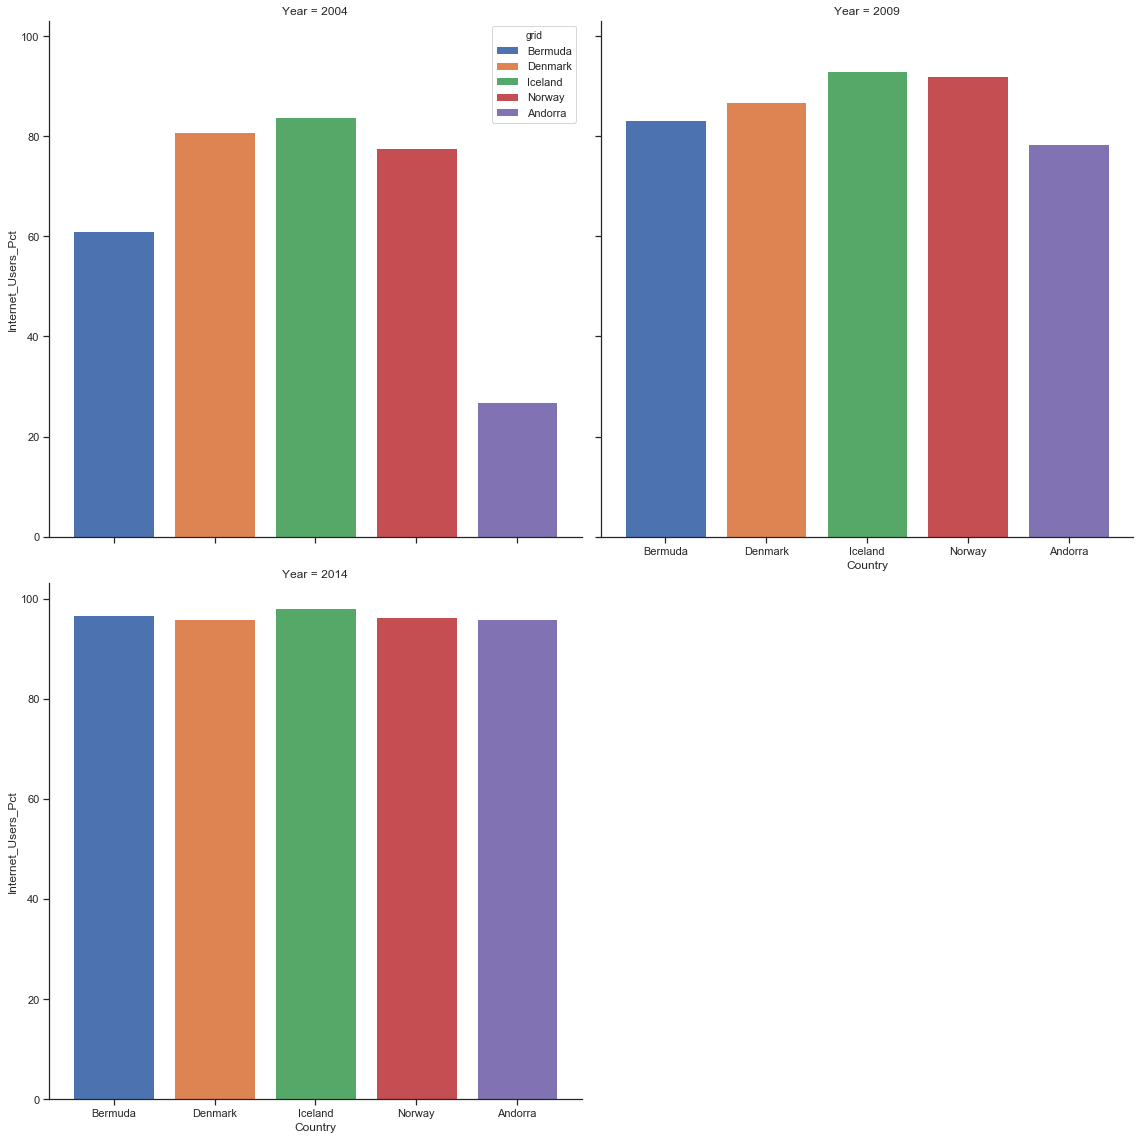

In [322]:
# Add data to a histogram - work on bin size
g =sns.FacetGrid(top_5_internet, hue="Country", col_wrap=2, height=8, col="Year", legend_out=False)
g.map(plt.bar, "Country","Internet_Users_Pct")
g.add_legend(title="grid")

In [323]:
# Add data to a histogram - work on bin size
# g =sns.FacetGrid(top_5_internet, hue="Country", col_wrap=2, height=8, col="Year", legend_out=False)
# g.map(plt.hist, "Internet_Users_Pct", bins=10)
# g.add_legend(title="Country")

Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [ ]:
gdp_internet_5_2014 = gdp_internet_2014.nlargest(5,"Internet_Users_Pct")
gdp_internet_top5_2014